<img width="800px" src="../fidle/img/00-Fidle-header-01.svg"></img>

# <!-- TITLE --> [AE2] - Exploring our denoiser model
<!-- DESC --> Episode 2 : Using the previously trained autoencoder to denoise data
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->

## Objectives :
 - Retrieve and use our denoiser model


## What we're going to do :

 - Load a saved model
 - Encode/decode some test images (neved used, never seen by the model)


## Step 1 - Init python stuff
### 1.1 - Init

In [2]:
import numpy as np
import sys
import h5py
import random

from modules.AE import AE

sys.path.append('..')
import fidle.pwk as pwk

datasets_dir = pwk.init('AE2')

<br>**FIDLE 2020 - Practical Work Module**

Version              : 2.0.19
Notebook id          : AE2
Run time             : Friday 12 March 2021, 22:06:34
TensorFlow version   : 2.2.0
Keras version        : 2.3.0-tf
Datasets dir         : /home/pjluc/datasets/fidle
Run dir              : ./run
Update keras cache   : False


### 1.2 - Parameters
`output_dir` : Place where prepared dataset was saved(need 420 Mo)  
`output_filename` : Filename of the prepared dataset  

In [3]:
output_dir      = './data'
output_filename = 'mnist-noisy.h5'

## Step 2 - Reload prepared dataset

In [5]:
with  h5py.File(f'{output_dir}/{output_filename}','r') as f:
    x_test  = f['x_test'][:]
    y_test  = f['y_test'][:]
    print('Loaded.')
    print('x_test shape is : ',x_test.shape)
    print('y_test shape is : ',y_test.shape)

Loaded.
x_test shape is :  (10000, 28, 28, 1)
y_test shape is :  (10000, 28, 28, 1)


## Step 3 - Reload best model

In [6]:
ae=AE()
ae.reload('./run/models/best_model')

Reloaded.


## Step 4 - Image reconstruction

In [7]:
y_pred = ae.predict(x_test)
print('y_pred shape : ',y_pred.shape)

y_pred shape :  (10000, 28, 28, 1)


## Step 5 - Have a look

<br>**Noisy test images (input):**

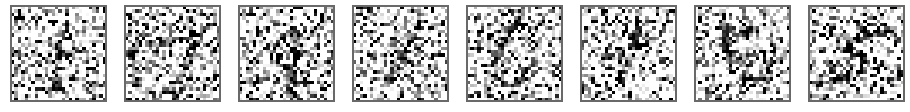

<br>**Predict test images (output):**

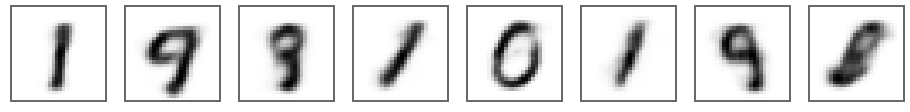

<br>**Real test images :**

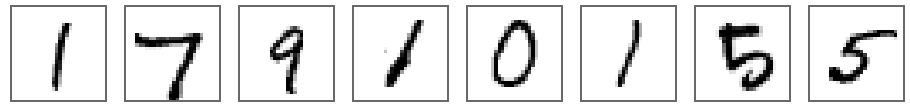

In [22]:
i=random.randint(0,len(y_pred)-8)
j=i+8

pwk.subtitle('Noisy test images (input):')
pwk.plot_images(x_test[i:j], None, indices='all', columns=8, x_size=2,y_size=2, interpolation=None, save_as='07-test-noisy')

pwk.subtitle('Predict test images (output):')
pwk.plot_images(y_pred[i:j], None, indices='all', columns=8, x_size=2,y_size=2, interpolation=None, save_as='08-test-predict')

pwk.subtitle('Real test images :')
pwk.plot_images(y_test[i:j], None, indices='all', columns=8, x_size=2,y_size=2, interpolation=None, save_as='09-test-real')



In [12]:
pwk.end()

End time is : Monday 28 December 2020, 23:59:16
Duration is : 00:02:31 652ms
This notebook ends here


---
<img width="80px" src="../fidle/img/00-Fidle-logo-01.svg"></img>